In [1]:
# imports
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch

from ldc.lisa.noise import get_noise_model
from ldc.common.series.timeseries import TimeSeries, TimeSeriesAccessor

In /home/philippe/.local/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/philippe/.local/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/philippe/.local/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/philippe/.local/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/philippe/.local/lib/python3.8/site-packages/matplotlib/

In [2]:
# define general parameters
target_t0 = 0 # s
target_dt = 5 # s
two_yrs_in_sec = 63115195.0 # s = 2 yrs
target_duration = 0.1 * (0.5 * two_yrs_in_sec)
pathdir = "/home/philippe/Desktop/livrables_yorsh/"

SBBH SNR~10 TDI1.5 verification
===========================

In [3]:
# load final data (2 yrs)
# filename_clean = pathdir+"TDI1p5_LDC_SBBH_SNR_11.82_Tobs_2yrs_noisefree.hdf5"
# # filename_noisy = pathdir+"sbbh-lisanode-withnoise-tdi_sbbh_snr_11p82_T_2yrs.h5"
# filename_noisy = "/home/philippe/Desktop/tdi_gw_noise_sbbh_11.82_v070720021.h5"
# # filename_clean = "/home/philippe/Desktop/sbbh-snr-11.82-lisanode-noisefree-tdi.h5"
# # filename_noisy = "/home/philippe/Desktop/sbbh-snr-11.82-lisanode-withnoise-tdi.h5"
# f_clean = h5py.File(filename_clean, "r")
# f_noisy = h5py.File(filename_noisy, "r")
# d_clean = f_clean["XYZ"]
# # d_clean = f_clean["data"]
# d_noisy = f_noisy["data"]

# load
TDI_TYPE = "Y"
rootdir = "/home/philippe/Desktop/debug_yorsh/runtest/T0.3_dt5/"
f_before = h5py.File(rootdir+"sbbh-lisanode-withnoise-tdi-raw.h5", "r")
X_before = f_before[TDI_TYPE][:, 1]
f_before.close()
f_after = h5py.File(rootdir+"sbbh-lisanode-withnoise-tdi.h5", "r")
X_after = f_after["data"][TDI_TYPE]
f_after.close()

In [4]:
## general checks
# t_clean = d_clean[:, 0]
# t_noisy = d_noisy["t"]

# # final cadence (in s)
# dt_clean = t_clean[1] - t_clean[0]
# dt_noisy = t_noisy[1] - t_noisy[0]
# if np.isclose(target_dt, dt_clean, atol=1e-3):
#     print(f"OK dt for noisefree TDI (dt_noisefree = {dt_clean})")
# if np.isclose(target_dt, dt_noisy, atol=1e-3):
#     print(f"OK dt for noisy TDI (dt_noisy = {dt_noisy[0]})")
    
# # duration (in s, yrs)
# duration_clean = t_clean[-1] - t_clean[0]
# duration_noisy = t_noisy[-1] - t_noisy[0]
# if np.isclose(target_duration, duration_clean, atol=1e-3):
#     print(f"OK duration for noisefree TDI (duration_noisefree = {duration_clean})")
# if np.isclose(target_duration, duration_noisy, atol=1e-3):
#     print(f"OK duration for noisy TDI (duration_noisy = {duration_noisy[0]})")
    
# # initial time (in s)
# t0_clean = t_clean[0]
# t0_noisy = t_noisy[0]
# if np.isclose(target_t0, t0_clean, atol=1e-3):
#     print(f"OK t0 for noisefree TDI (t0_noisefree = {t0_clean})")
# if np.isclose(target_t0, t0_noisy, atol=1e-3):
#     print(f"OK t0 for noisy TDI (t0_noisy = {t0_noisy[0]})")

In [5]:
## Compute PSD
X_after = X_after[~np.isnan(X_after)]

dt_before = 0.25 #s
dt_after = 5 # s
skipf_before = 100
skipf_after = 100
nperseg=50000
window="nuttall"

f_before, psd_before = welch(X_before[skipf_before:], fs=1.0/dt_before, window=window, nperseg=nperseg)
f_after, psd_after = welch(X_after[skipf_after:], fs=1.0/dt_after, window=window, nperseg=nperseg)

# reference PSD
tdi2 = False
noise_model = "MRDv1" # "SciRDv1"
N_ldc = get_noise_model(noise_model, f_before)
psd_ref = N_ldc.psd(f_before, option='X', tdi2=tdi2)

# print(f_ref[0].data, f_ref[-1].data, f_ref[1].data-f_ref[0].data, len(f_ref))
# print(f_clean[0], f_clean[-1], f_clean[1]-f_clean[0], len(f_clean))
# print(f_noisy[0], f_noisy[-1], f_noisy[1]-f_noisy[0], len(f_noisy))

/usr/local/lib/python3.8/dist-packages/ldc-0.1-py3.8-linux-x86_64.egg/ldc/lisa/noise/noise.py:213: RuntimeWarning: divide by zero encountered in true_divide
  Sa_a = self.DSa_a[model] * (1.0 +(0.4e-3/frq)**2) *\
/usr/local/lib/python3.8/dist-packages/ldc-0.1-py3.8-linux-x86_64.egg/ldc/lisa/noise/noise.py:215: RuntimeWarning: divide by zero encountered in power
  self.Sa_d = Sa_a*(2.*np.pi*frq)**(-4.) # in displacement
/usr/local/lib/python3.8/dist-packages/ldc-0.1-py3.8-linux-x86_64.egg/ldc/lisa/noise/noise.py:216: RuntimeWarning: invalid value encountered in multiply
  Sa_nu = self.Sa_d*(2.0*np.pi*frq/CLIGHT)**2 # in rel freq unit
/usr/local/lib/python3.8/dist-packages/ldc-0.1-py3.8-linux-x86_64.egg/ldc/lisa/noise/noise.py:220: RuntimeWarning: divide by zero encountered in true_divide
  self.Soms_d = self.DSoms_d[model] * (1. + (2.e-3/frq)**4) # in displacement
/usr/local/lib/python3.8/dist-packages/ldc-0.1-py3.8-linux-x86_64.egg/ldc/lisa/noise/noise.py:221: RuntimeWarning: invalid va

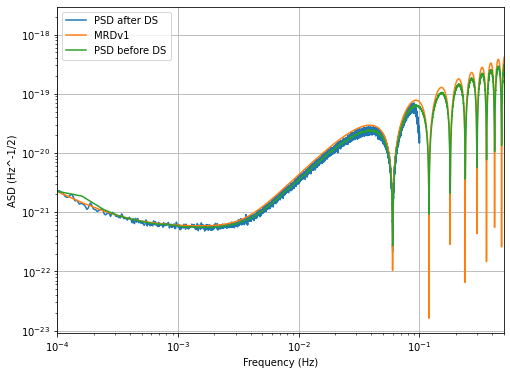

In [6]:
## plot PSDs
asd_ref = np.sqrt(psd_ref)
asd_before = np.sqrt(psd_before)
asd_after = np.sqrt(psd_after)

def shift_freq(f, x, shift):
	# shift in Hz
	df = f[1]-f[0]
	nsamples = round(shift / df)
	print(f"Shift in FD by {nsamples} samples")
	return np.roll(x, nsamples)

# asd_after = shift_freq(f_before, asd_after, -1.14)

fplot = plt.loglog
fig = plt.figure(figsize=(8, 6))
fplot(f_after, asd_after, label="PSD after DS")
fplot(f_before, asd_ref, label=noise_model)
fplot(f_before, asd_before, label="PSD before DS")
plt.xlim([1e-4, 5e-1])
plt.xlabel("Frequency (Hz)")
plt.ylabel("ASD (Hz^-1/2)")
plt.legend()
plt.grid()
plt.show()